# EDA

## 1 часть домашнего задания: к теме Введение в машинное обучение

In [382]:
!pip install polars

In [383]:
#Импорт библиотек
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import numpy as np
import time

In [384]:
#Загрузка датасета
df = pd.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone.csv')

In [385]:
#Проверю размер датасета
df.shape

(4177, 9)

In [386]:
#Выведу случайные 5 строчек датасета
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3463,M,0.625,0.485,0.170,1.4370,0.5855,0.2930,0.4750,11
447,M,0.565,0.455,0.185,0.9265,0.3540,0.1575,0.3750,16
3737,M,0.625,0.470,0.150,1.1240,0.5560,0.2315,0.2870,9
1583,I,0.510,0.395,0.130,NaN,0.2810,0.1430,0.1620,7
2390,F,0.455,0.350,0.125,0.4485,0.1585,0.1020,0.1335,16


In [387]:
#Выведу количество пропусков в датасете по столбцам
(df.isna().sum()/len(df)).map('{:.2%}'.format)

Sex               0.00%
Length            0.00%
Diameter          2.37%
Height            0.00%
Whole weight      2.37%
Shucked weight    0.00%
Viscera weight    0.00%
Shell weight      1.20%
Rings             0.00%
dtype: object

In [388]:
df = df.dropna()

Пропусков в датасете совсем мало, меньше 5 процентов от общего числа наблюдений, их можно удалить 

### Однофакторный анализ

<Axes: >

(array([1365.,    0.,    0., 1190.,    0.,    0., 1195.,    0.,    0.,
         185.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Sex')

<Axes: >

(array([  7.,  56., 138., 287., 433., 731., 996., 953., 307.,  27.]),
 array([0.075, 0.149, 0.223, 0.297, 0.371, 0.445, 0.519, 0.593, 0.667,
        0.741, 0.815]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Length')

<Axes: >

(array([ 13.,  60., 171., 328., 481., 761., 962., 876., 261.,  22.]),
 array([0.055 , 0.1145, 0.174 , 0.2335, 0.293 , 0.3525, 0.412 , 0.4715,
        0.531 , 0.5905, 0.65  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Diameter')

<Axes: >

(array([9.630e+02, 2.948e+03, 2.200e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.113, 0.226, 0.339, 0.452, 0.565, 0.678, 0.791, 0.904,
        1.017, 1.13 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Height')

<Axes: >

(array([598., 733., 782., 780., 576., 270., 121.,  54.,  16.,   5.]),
 array([2.00000e-03, 2.84350e-01, 5.66700e-01, 8.49050e-01, 1.13140e+00,
        1.41375e+00, 1.69610e+00, 1.97845e+00, 2.26080e+00, 2.54315e+00,
        2.82550e+00]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Whole weight')

<Axes: >

(array([744., 987., 907., 726., 381., 116.,  42.,  23.,   6.,   3.]),
 array([1.0000e-03, 1.4970e-01, 2.9840e-01, 4.4710e-01, 5.9580e-01,
        7.4450e-01, 8.9320e-01, 1.0419e+00, 1.1906e+00, 1.3393e+00,
        1.4880e+00]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Shucked weight')

<Axes: >

(array([785., 939., 971., 709., 339., 136.,  49.,   5.,   1.,   1.]),
 array([5.0000e-04, 7.6450e-02, 1.5240e-01, 2.2835e-01, 3.0430e-01,
        3.8025e-01, 4.5620e-01, 5.3215e-01, 6.0810e-01, 6.8405e-01,
        7.6000e-01]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Viscera weight')

<Axes: >

(array([7.340e+02, 9.620e+02, 1.023e+03, 7.470e+02, 3.270e+02, 9.700e+01,
        3.100e+01, 8.000e+00, 5.000e+00, 1.000e+00]),
 array([0.0015 , 0.10185, 0.2022 , 0.30255, 0.4029 , 0.50325, 0.6036 ,
        0.70395, 0.8043 , 0.90465, 1.005  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Shell weight')

<Axes: >

(array([  15.,  405., 1557., 1312.,  310.,  213.,   89.,   27.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Rings')

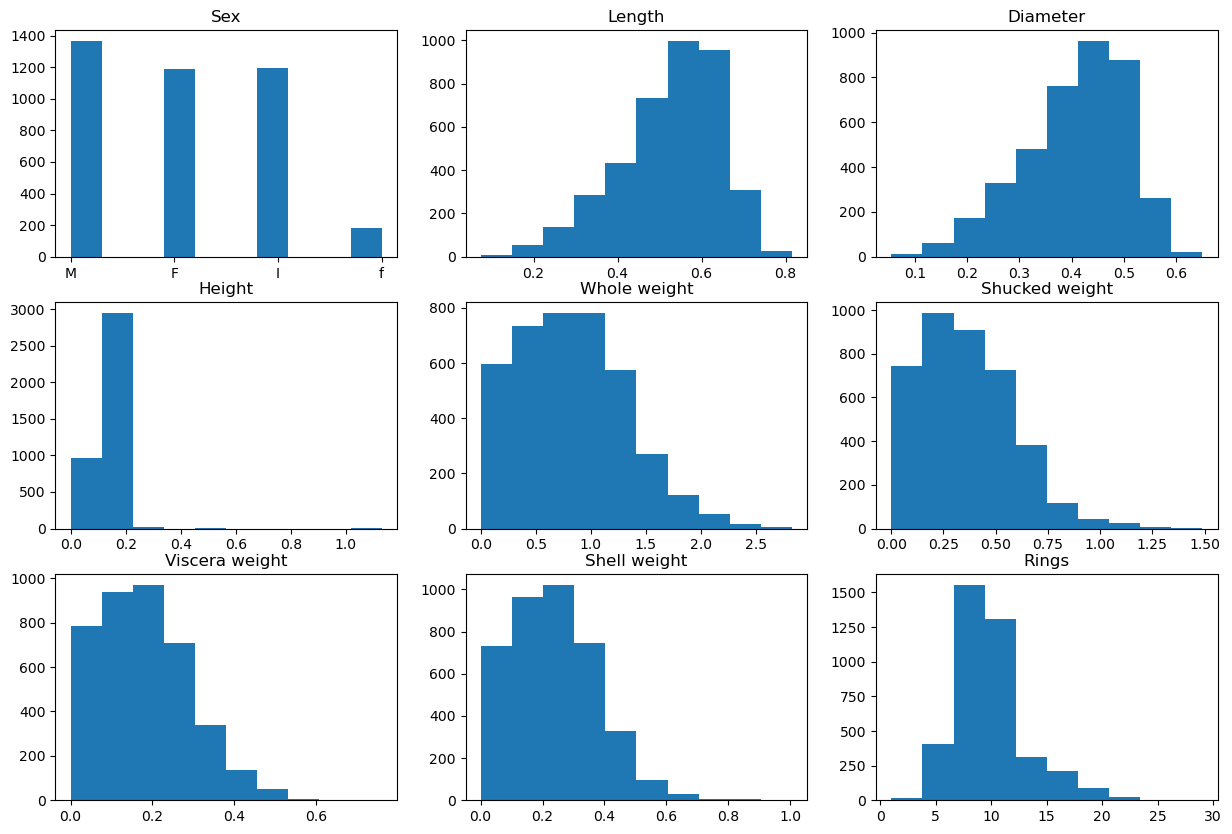

In [391]:
cnt = 0
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3, cnt+1) 
        plt.hist(df.iloc[:, cnt])
        plt.title(df.columns[cnt])
        cnt +=1

- Sex в датасете представлен пости равномерно, с небольшим перевесом больше представителей мужского пола. Ненамного меньше всех инфантов. Выявлено, что около 200 значений некорректно названы - переименую их;
- Lenght и Diameter имеют скошенное влево распределение, диапозон значений  от 0.1 до 0.8
- Height в основном большинство значений находится в диапазоне от 0 до 0.2. Очевидно, что 0 - ошибочное значение, его надо удалить, а значения больше 0.2  -  выбросы - их также можно удалить.
- Whole weight, Shuckes weight, Viscera weight, Shell weight - распределение имеют распределение скошенное вправо

In [393]:
df = df.replace('f','F')

In [394]:
#Проверю количество значений равных 0
for i in df.columns:
    print(i, len(df[df[i]==0]))

Sex 0
Length 0
Diameter 0
Height 2
Whole weight 0
Shucked weight 0
Viscera weight 0
Shell weight 0
Rings 0


In [395]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000,3935.000000
mean,0.524025,0.407886,0.139494,0.828339,0.359248,0.180457,0.238578,9.928081
std,0.119991,0.099156,0.042002,0.489612,0.221683,0.109259,0.138982,3.207161
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441750,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.501250,0.252000,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<Axes: >

Text(0.5, 1.0, 'Sex')

<Axes: >

Text(0.5, 1.0, 'Length')

<Axes: >

Text(0.5, 1.0, 'Diameter')

<Axes: >

Text(0.5, 1.0, 'Height')

<Axes: >

Text(0.5, 1.0, 'Whole weight')

<Axes: >

Text(0.5, 1.0, 'Shucked weight')

<Axes: >

Text(0.5, 1.0, 'Viscera weight')

<Axes: >

Text(0.5, 1.0, 'Shell weight')

<Axes: >

Text(0.5, 1.0, 'Rings')

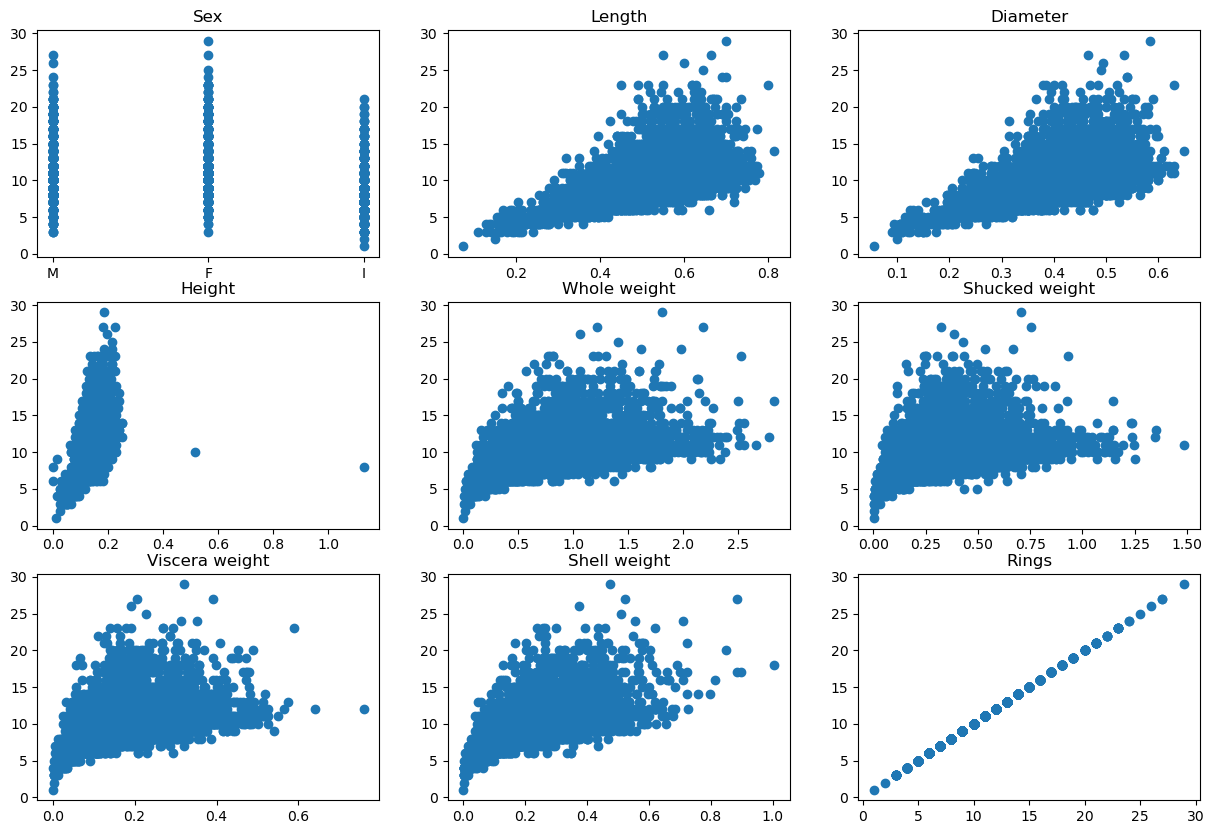

In [396]:
cnt = 0
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
for i in range(3):
    for j in range(3):
        plt.subplot(3,3, cnt+1) 
        plt.scatter(df.iloc[:, cnt], df['Rings'])
        plt.title(df.columns[cnt])
        cnt +=1

In [404]:
#Удалю тяжелые хвосты в скошенных распределениях
df = df[(df['Height']!=0) & (df['Height']<=0.2)]
df = df[(df['Shucked weight']<=0.5)]
df = df[(df['Viscera weight']<=0.25)]
df = df[(df['Shell weight']<=0.32)]

По графикам можно сказать о наличии ярко выраженной зависимости с целевой переменной таких признаков как: Lenght, Diameter, weight. При удалении выбросов в Height также будет видна зависимость.

### ANOVA

Посчитаю корреляцию с помощью теста ANOVA категориальной переменной и целевой переменной.

In [412]:
category_group = df.groupby('Sex')['Rings'].apply(list)
Anova_results = f_oneway(*category_group)

In [257]:
Anova_results

F_onewayResult(statistic=241.36321274131754, pvalue=8.773459156448421e-97)

Получен pvalue очень маленькое значение, близкое к нулю. Он меньше, чем 0.5. Значит, по тесту ANOVA зависимость между полом и числом колец есть.

### Корреляция Спирмана

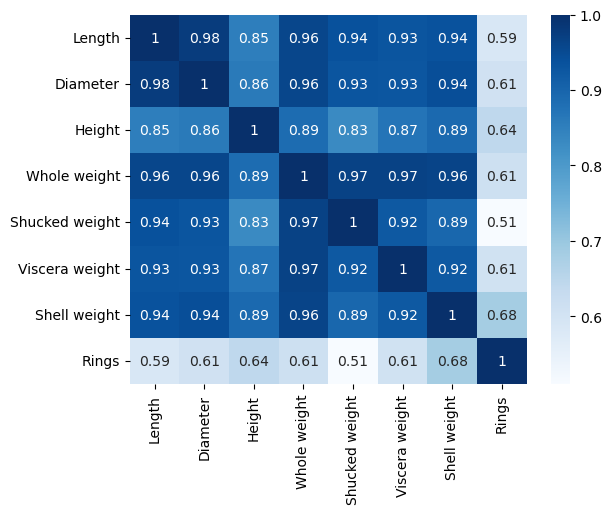

In [261]:
corr = df.iloc[:,1:].corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True);

По корреляции Спирмана видно, что признаки очень хорошо коррелируют между собой, и не так хорошо с целевой переменной. Это значит, что от ряда признаков можно отказаться, иначе модель может плохо обучиться. <br> 
Наибольшая корреляции с целевой переменной у Shell weight, наименьшая - Shuched weight. Shell weight имеет корреляцию близкую к 1 почти со всеми признаким. Значит, можно оставить только этот признак, остальные удалить.

### Анализ целевой переменной

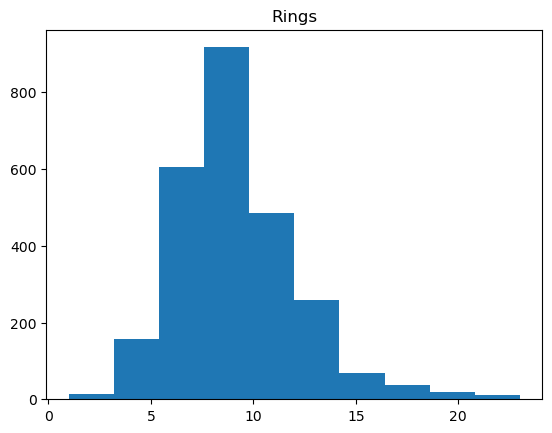

In [265]:
plt.hist(df['Rings'])
plt.title('Rings')
plt.show()

На гистограмме видно,что распределение далеко от нормального, оно скошено вправо. Наблюдатеся сильный дисбаланс классов, что может привести к тому что, что модель плохо обучится на редких значениях и практически не будет их предсказывать.

### Выводы
<br> В данных оказалось небольшое количество пропущенных значений - были удалены. У всех признаков логнормальное распределение - тяжелые хвосты слева или справа. Были удалены выбросы. Выявлены и удалены ошибочные значения - 0 в признаках Height, подкорректированы названия признаков.
<br> Все признаки имеют положительную корреляцию с целевой переменной и очень большая корреляция между собой - что очень плохо - рекомендовано при обучении модели использовать только один признак, наиболее коррелирующий с целевой переменной  - Shell weight.
<br> У целевой переменной выявлен сильный дисбаланс классов, что приведет к тому, что модель будет плохо предсказывать большие значений. Рекомандовано либо искусственно увеличить выборку, либо донабрать данные.

###  Сравнение pandas и polaris

Увеличу датасет до 1 млн строк

In [88]:
df = df.iloc[np.arange(len(df)).repeat(240)]

In [90]:
df.shape

(1002480, 9)

In [91]:
df.to_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

In [95]:
%%time
df = pd.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

CPU times: total: 594 ms
Wall time: 759 ms


,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
3,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
...,...,...,...,...,...,...,...,...,...,...
1002475,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002476,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002477,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12
1002478,4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


In [102]:
%%time
df_pl = pl.read_csv('C:/Users/Latic/OneDrive/Документы/kuggle/abalone_2.csv')

CPU times: total: 453 ms
Wall time: 92.3 ms


Polars  загрузил данные быстрее 422 мсек, Pandas - почти в два раза медленнее.

Сравню скорость фильтрации у Polars и Pandas

In [99]:
%%time
df[(df['Sex']=='M')&(df['Height']>0.5)]

CPU times: total: 93.8 ms
Wall time: 108 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
...,...,...,...,...,...,...,...,...,...
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,M,0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10


In [103]:
%%time
df_pl.filter((pl.col('Sex')=='M')&(pl.col('Height')>0.5))

CPU times: total: 0 ns
Wall time: 31.3 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
i64,str,f64,f64,f64,f64,f64,f64,f64,i64
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
…,…,…,…,…,…,…,…,…,…
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10
1417,"""M""",0.705,0.565,0.515,2.21,1.1075,0.4865,0.512,10


Скорость фильтрации у Polars намного выше, в три раза быстрее Pandas

Сравню скорость аггрегации у двух библиотек

In [107]:
%%time
df.groupby('Sex').agg({'Length':'mean', 'Diameter':'mean', 'Height':'mean', 'Shucked weight':'mean','Whole weight':'max', 'Shell weight':'mean'})

CPU times: total: 31.2 ms
Wall time: 113 ms


,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
Sex,,,,,,
F,0.578828,0.454207,0.158018,0.445328,2.6570,0.301868
I,0.427273,0.325737,0.107931,0.190446,2.0495,0.128035
M,0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
f,0.535205,0.417037,0.142667,0.386469,2.8255,0.251617


In [111]:
%%time
df_pl.group_by('Sex').agg([pl.mean('Length'), pl.mean('Diameter'), pl.mean('Height'), pl.mean('Shucked weight'),pl.max('Whole weight'), pl.mean('Shell weight')])

CPU times: total: 109 ms
Wall time: 69.5 ms


Sex,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
str,f64,f64,f64,f64,f64,f64
"""F""",0.578828,0.454207,0.158018,0.445328,2.657,0.301868
"""f""",0.535205,0.417037,0.142667,0.386469,2.8255,0.251617
"""M""",0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
"""I""",0.427273,0.325737,0.107931,0.190446,2.0495,0.128035


In [114]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='Sex')
    .agg(
        [
           pl.mean('Length'),
            pl.mean('Diameter'), 
            pl.mean('Height'), 
            pl.mean('Shucked weight'),
            pl.max('Whole weight'), 
            pl.mean('Shell weight')
        ]
    )
)

CPU times: total: 0 ns
Wall time: 0 ns


In [116]:
%%time

q.collect()

CPU times: total: 125 ms
Wall time: 44.7 ms


by,Length,Diameter,Height,Shucked weight,Whole weight,Shell weight
str,f64,f64,f64,f64,f64,f64
"""M""",0.560059,0.438339,0.150847,0.429882,2.7795,0.279888
"""F""",0.578828,0.454207,0.158018,0.445328,2.657,0.301868
"""f""",0.535205,0.417037,0.142667,0.386469,2.8255,0.251617
"""I""",0.427273,0.325737,0.107931,0.190446,2.0495,0.128035


Лучший результат показал Polars - 44.7 мсек. Pandas оказалася медленнее больше чем в два раза

## 2 часть домашнего задания к теме Пайплайн проекта

### Обучение модели

In [490]:
#импорт библиотек
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score

In [492]:
X = df.drop('Rings', axis=1)
y = (df['Rings']>10).astype(int)

In [494]:
#Разделю данные на тренировочные и тестовые
X_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.25)

In [496]:
#Отберу числовые признаки
numeric = X.columns[X.dtypes != 'object']

In [498]:
leaderboard = pd.DataFrame(columns=['model', 'GD', 'score'])

In [500]:
#Метод ближайших соседей
pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', KNeighborsClassifier()) # обучение модели
    ])
kneiborsclassifier = pipe.fit(X_train[numeric], y_train)

accuracy_score(y_test, kneiborsclassifier.predict(x_test[numeric]))

0.7869362363919129

In [502]:
leaderboard.loc[len(leaderboard)] = ['KNeighborsClassifier', '-', accuracy_score(y_test,pipe.predict(x_test[numeric]))]

In [504]:
#Случайный лес
pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', RandomForestClassifier()) # обучение модели
    ])
randomforestclassifier = pipe.fit(X_train[numeric], y_train)

accuracy_score(y_test,randomforestclassifier.predict(x_test[numeric]))

0.8087091757387247

In [506]:
leaderboard.loc[len(leaderboard)] = ['RandomForestClassifier', '-', accuracy_score(y_test,pipe.predict(x_test[numeric]))]

In [508]:
#Наивный Байес
pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', GaussianNB()) # обучение модели
    ])
gaussiannb = pipe.fit(X_train[numeric], y_train)

accuracy_score(y_test,gaussiannb.predict(x_test[numeric]))

0.6298600311041991

In [510]:
leaderboard.loc[len(leaderboard)] = ['GaussianNB', '-', accuracy_score(y_test,pipe.predict(x_test[numeric]))]

In [512]:
#Логистическая регрессия
pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', LogisticRegression()) # обучение модели
    ])
logisticregression = pipe.fit(X_train[numeric], y_train)

accuracy_score(y_test,logisticregression.predict(x_test[numeric]))

0.7978227060653188

In [514]:
leaderboard.loc[len(leaderboard)] = ['LogisticRegression', '-', accuracy_score(y_test,pipe.predict(x_test[numeric]))]

In [516]:
leaderboard.sort_values(by='score', ascending=False)

,model,GD,score
1,RandomForestClassifier,-,0.808709
3,LogisticRegression,-,0.797823
0,KNeighborsClassifier,-,0.786936
2,GaussianNB,-,0.629860


Наилучший результат среди моделей с базовыми параметрами показал случайный лес. Несмотря на то, что данный алгоритм имеет тенденцию к переобучению. Немного хуже результат показали логистическая регрессия и метод ближайших соседей. 

### Обучение модели с подбором гиперпараметров

In [519]:
#Подбор гиперпараметров для метода ближайших соседей
params = {'model__n_neighbors' : np.arange(2, 10, 2)}

pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', KNeighborsClassifier()) # обучение модели
    ])

gs_kneibors = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_kneibors.fit(X_train[numeric], y_train)
accuracy_score(y_test, gs_kneibors.predict(x_test[numeric]))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': array([2, 4, 6, 8])},
             scoring='accuracy', verbose=2)

0.776049766718507

In [520]:
leaderboard.loc[len(leaderboard)] = ['KNeighborsClassifier', '+', accuracy_score(y_test,gs_kneibors.predict(x_test[numeric]))]

In [521]:
#Подбор гиперпараметров для случайного леса
params = {'model__max_depth' : np.arange(2, 10, 2),
           'model__n_estimators': np.arange(10,100,10),
           'model__criterion':['gini','entropy']}

pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', RandomForestClassifier()) # обучение модели
    ])

gs_randomforest = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_randomforest.fit(X_train[numeric], y_train)
accuracy_score(y_test, gs_randomforest.predict(x_test[numeric]))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([2, 4, 6, 8]),
                         'model__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy', verbose=2)

0.807153965785381

In [522]:
leaderboard.loc[len(leaderboard)] = ['RandomForestClassifier', '+', accuracy_score(y_test,gs_kneibors.predict(x_test[numeric]))]

In [523]:
#Подбор гиперпараметров для наивного байеса
params = {'model__var_smoothing' : [1e-02, 1e-03, 1e-04,1e-05, 1e-06, 1e-07, 1e-08, 1e-09]}

pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', GaussianNB()) # обучение модели
    ])

gs_gaussiannb = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_gaussiannb.fit(X_train[numeric], y_train)
accuracy_score(y_test, gs_gaussiannb.predict(x_test[numeric]))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': [0.01, 0.001, 0.0001, 1e-05,
                                                  1e-06, 1e-07, 1e-08, 1e-09]},
             scoring='accuracy', verbose=2)

0.6298600311041991

In [524]:
leaderboard.loc[len(leaderboard)] = ['GaussianNB', '+', accuracy_score(y_test,gs_gaussiannb.predict(x_test[numeric]))]

In [525]:
#Подбор гиперпараметров для логистической регрессии
params = {'model__penalty': ['l2'],
          'model__class_weight':[None, 'balanced']}

pipe = Pipeline([
    ('stand', MinMaxScaler()), # преобразование данных
    ('model', LogisticRegression()) # обучение модели
    ])

gs_logisticregression = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_logisticregression.fit(X_train[numeric], y_train)
accuracy_score(y_test, gs_logisticregression.predict(x_test[numeric]))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('stand', MinMaxScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__penalty': ['l2']},
             scoring='accuracy', verbose=2)

0.7978227060653188

In [528]:
leaderboard.loc[len(leaderboard)] = ['LogisticRegression', '+', accuracy_score(y_test,gs_logisticregression.predict(x_test[numeric]))]

In [529]:
leaderboard.sort_values('score', ascending = False)

,model,GD,score
1,RandomForestClassifier,-,0.808709
3,LogisticRegression,-,0.797823
7,LogisticRegression,+,0.797823
0,KNeighborsClassifier,-,0.786936
4,KNeighborsClassifier,+,0.776050
5,RandomForestClassifier,+,0.776050
2,GaussianNB,-,0.629860
6,GaussianNB,+,0.629860


Лучший результат был получен случайным лесом без подбора параметров. Score = 0.800. Подбор гиперпараметров не ухудшил результат. Подбор гиперпараметров положительно повлиял на результат только на методе ближайших соседей, на 0.1 улучшил результат. Возможно, необходимо расширить диапазон параметров для достижения наилучших результатов.

Добавлю категориальные данные, закодирую их и зааново подберу гиперпараметры для логистической регрессии

In [543]:
categorial = X.columns[X.dtypes=='object']

In [545]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorial),
    ('scaling', MinMaxScaler(), numeric)
])

In [547]:
#Подбор гиперпараметров для случайного леса
params = {'model__max_depth' : np.arange(2, 10, 2),
           'model__n_estimators': np.arange(10,100,10),
           'model__criterion':['gini','entropy']}

pipe = Pipeline([
    ('сt', ct), # преобразование данных
    ('model', RandomForestClassifier()) # обучение модели
    ])

gs_randomforestclassifier = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs_randomforestclassifier.fit(X_train, y_train)
accuracy_score(y_test, gs_randomforestclassifier.predict(x_test))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('сt',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Sex'], dtype='object')),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object'))])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([2, 4, 6, 8]),
                         'model__n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy', verbose=2)

0.807153965785381

Метрика немного ухудшилась: без категориальных переменных accuracy  был 0.808 , с добавлением - 0.807. Скорее всего добавление признаков повлияло на переобучение модели.

### Explainer Dashboard

In [550]:
!pip install explainerdashboard -q

In [551]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [552]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [553]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(x_test)

In [554]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric)

In [560]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

In [562]:
explainer = ClassifierExplainer(gs_randomforestclassifier.best_estimator_, X_test_transformed.iloc[:10], y_test.iloc[:10])

splitting pipeline...
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [564]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packag

Calculating prediction probabilities...
Calculating metrics...


C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packag

In [566]:
db.run()

Starting ExplainerDashboard on http://10.109.216.40:8050


C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\Latic\anaconda3\Lib\site-packag

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_f0c0865c-a6ed-4cce-bc84-2d175cbc644b (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001FB863357C0>: Failed to establish a new connection: [WinError 10049] Требуемый адрес для своего контекста неверен'))

In [574]:
#Доля положительных ответов среди всех ответов
sum(y)/len(y)

0.22433903576982892

**Выводы по интерактивному дашборду**
1. Наиболее важные факторы в среднем по получению прогноза согласно анализу Permutation importance дают признаки: Shucked weight, Shell weight, Viscera weight. И совсем не влияют на результат такие признаки как пол, высота и вес в целом. Важными факторами согласно анализу Shap values являются Shell weight, Shucked weight, Whole wheight. Остальные признаки намного меньше влияют на результат. Таким образом, несмотря на некоторые различия в результатах по разным подходам, можно выделить общую тенденцию: самыми важными признаками являются признаки, относящиеся к весу, пол, диаметр, высота не так сильно влияют  на количество колец у морских ушек.
2. Значения метрик:
   - Accuracy = 0.7 - т.е. доля правильных ответов чуть выше среднего относительно всех ответов;
   - Precision = 0.333 - доля правильных положительных ответов среди предсказаных положительных. Модель делает много ложноположительных предсказаний;
   - Recall = 0.5 - доля правильных положительных ответов в истинно-положительных ответах. Модель не очень хорошо различает классы, обнаруживает положительный класс;
Получается, что модель не очень хорошо предсказывает положительные ответы. Если посмотреть на целевую переменную, то можно увидеть, что в переменной сильный дисбаланс классов, что могло повлияет на предсказательную силу модели.  
   - f1 = 0.4 - не высокий показатель;
   - roc_auc_score = 0.812
3. Анализ индивидуальных значений.
   - Объект с индексом 6. У него отрицательный класс, модель предсказала вероятность отрицательного класса как 99.4%. Т.е. очень выоская вероятность отрицательного класса. Наибольший вклад в уверенность, что морское ушко относится к отрицательному классу дали Shell weight, whole_weight. Немного снизило вероятность (на 5% Shucked_weight - слишком маленький вес);
   - Объект с индексом 5. У него положительный класс, модель предсказала вероятность положительного класса как 10.5%. Т.е. очень выоская вероятность отрицательного класса. Модель ошиблась. Наибольший вклад в уверенность, что морское ушко относится к отрицательному классу дали Shucked_weight - морское ушко много весит и длина. Почти все признаки по мнению модели указывали на отрицательный класс, кроме Wiscers weight и lenght;
   - Объект с индексом 1. У него положительный класс, модель предсказала вероятность положительного класса как 8.6%. Т.е. очень выоская вероятность отрицательного класса. Модель ошиблась. Наибольший вклад в уверенность, что морское ушко относится к отрицательному классу дали Shucked_weight, Shecked_weight - морское ушко много весит. Почти все признаки по мнению модели указывали на отрицательный класс, кроме пола;
     

Таким образом, на основании анализа полученных метрик, можно сказать, что модель очень плохо предсказывает положительный класс, часто ошибается, и почти совсем не распознает истинно положительный класс. На данный результат мог повлиять дисбаланс классов.  